In [1]:
import datacube
import matplotlib.patches as patches
import DEAPlotting
import matplotlib.pyplot as plt
#dc = datacube.Datacube(env='sentinel2betatmp', config='/home/547/aw3463/.sent2.conf')
dc = datacube.Datacube()
query={'time': ('2015-01-01', '2015-12-31'),
 'lat': (-30.595141582265763, -30.573900084400902),
 'lon': (115.14502132590322, 115.16618234076345),
 'output_crs': 'EPSG:3577',
 'resampling': 'bilinear',
 'resolution': (-25.0, 25.0)}
b_names = ['nbar_coastal_aerosol', 'nbar_blue', 'nbar_green', 'nbar_red', 'nbar_red_edge_1', 'nbar_red_edge_2', 'nbar_red_edge_3', 'nbar_nir_1', 'nbar_nir_2', 'nbar_swir_2', 'nbar_swir_3']
#sat_array = dc.load(product='s2b_ard_granule', measurements=b_names, **query)
sat_array = dc.load(product='ls8_nbar_scene', **query)
sat_array.rename({'1': 'coastal_aerosol', '2': 'blue', '3': 'green', '4': 'red', '5': 'nir', '6': 'swir1', '7': 'swir2'}, inplace=True)


<xarray.Dataset>
Dimensions:          (time: 23, x: 93, y: 106)
Coordinates:
  * time             (time) datetime64[ns] 2015-01-04T02:11:17 ...
  * y                (y) float64 -3.433e+06 -3.433e+06 -3.433e+06 -3.433e+06 ...
  * x                (x) float64 -1.595e+06 -1.595e+06 -1.595e+06 -1.595e+06 ...
Data variables:
    coastal_aerosol  (time, y, x) int16 725 634 464 492 532 536 501 490 541 ...
    blue             (time, y, x) int16 749 633 434 463 525 526 479 467 528 ...
    green            (time, y, x) int16 957 856 641 648 704 717 694 693 764 ...
    red              (time, y, x) int16 1127 967 659 697 778 789 748 743 854 ...
    nir              (time, y, x) int16 2721 2466 2204 2222 2182 2169 2237 ...
    swir1            (time, y, x) int16 2685 2319 1832 1932 2177 2165 2129 ...
    swir2            (time, y, x) int16 1575 1340 1019 1072 1217 1223 1192 ...
Attributes:
    crs:      EPSG:3577

In [2]:
durf = 100*sat_array.groupby('time').std()/sat_array.groupby('time').mean()

In [3]:
spee = durf.to_dataframe()


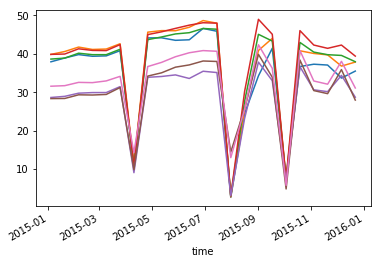

In [4]:
spee.plot(legend=False)


In [5]:
#DEAPlotting.three_band_image(sat_array2, bands = ['red', 'green', 'blue'], time = 0, contrast_enhance=False)

In [6]:
dc2 = datacube.Datacube()
query={'time': ('2017-01-01', '2017-12-31'),
 'lat': (-30.595141582265763, -30.573900084400902),
 'lon': (115.14502132590322, 115.16618234076345),
 'output_crs': 'EPSG:3577',
 'resampling': 'bilinear',
 'resolution': (-25.0, 25.0)}
geomed = dc2.load(product='ls8_nbart_geomedian_annual', **query)
geomed

<xarray.Dataset>
Dimensions:  (time: 1, x: 93, y: 106)
Coordinates:
  * time     (time) datetime64[ns] 2017-01-01
  * y        (y) float64 -3.433e+06 -3.433e+06 -3.433e+06 -3.433e+06 ...
  * x        (x) float64 -1.595e+06 -1.595e+06 -1.595e+06 -1.595e+06 ...
Data variables:
    blue     (time, y, x) int16 708 441 369 471 505 463 430 446 470 511 507 ...
    green    (time, y, x) int16 998 584 545 646 686 635 614 649 702 723 714 ...
    red      (time, y, x) int16 1105 595 522 675 731 672 627 657 733 770 772 ...
    nir      (time, y, x) int16 2743 2323 2344 2386 2308 2221 2258 2376 2420 ...
    swir1    (time, y, x) int16 2563 1475 1454 1823 1994 1983 1830 1802 2016 ...
    swir2    (time, y, x) int16 1571 833 781 1039 1171 1145 1027 1007 1149 ...
Attributes:
    crs:      EPSG:3577

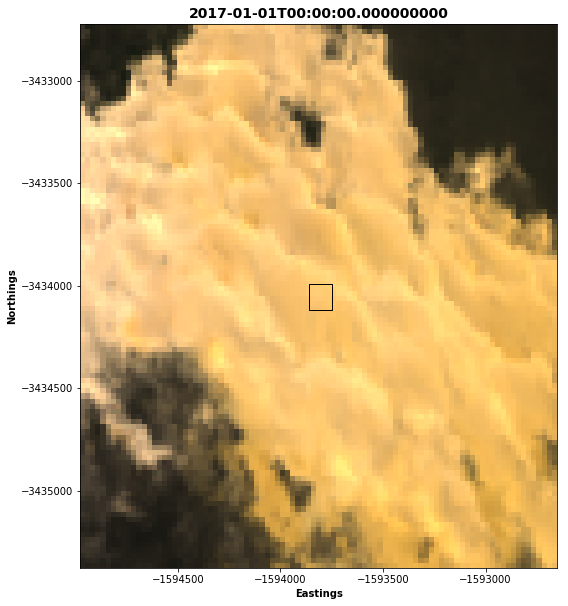

In [7]:
fig, axes = DEAPlotting.three_band_image(geomed, bands = ['red', 'green', 'blue'], time = 0, contrast_enhance=False)
rect = patches.Rectangle((-1593860,-3434120), 110, 130, angle=0.0, fill=False, color='black')
axes.add_patch(rect)
#axes.axis('off')
#axes.set_title('')

plt.savefig('tt.png', transparent=True)


In [8]:
del sat_array['coastal_aerosol']

In [9]:
diffo = sat_array - geomed.squeeze(dim='time')

xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset h

/g/data/v10/public/modules/dea-env/20180629/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step
xarray dataset has no spatial data; defaulting to plotting without coordinates. This can often be resolved by adding `keep_attrs = True` during an aggregation step


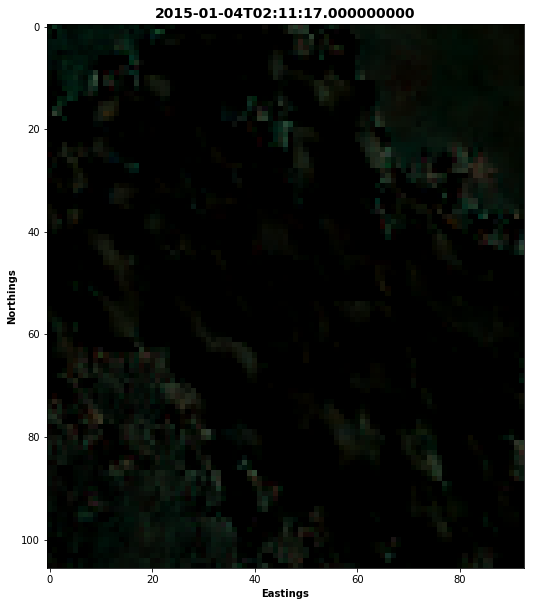

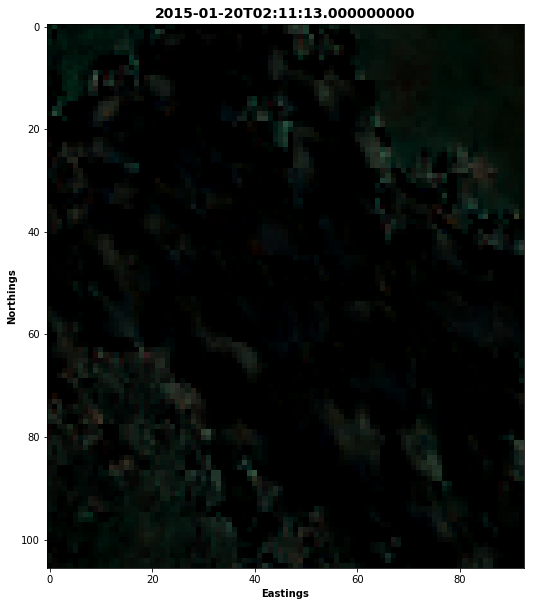

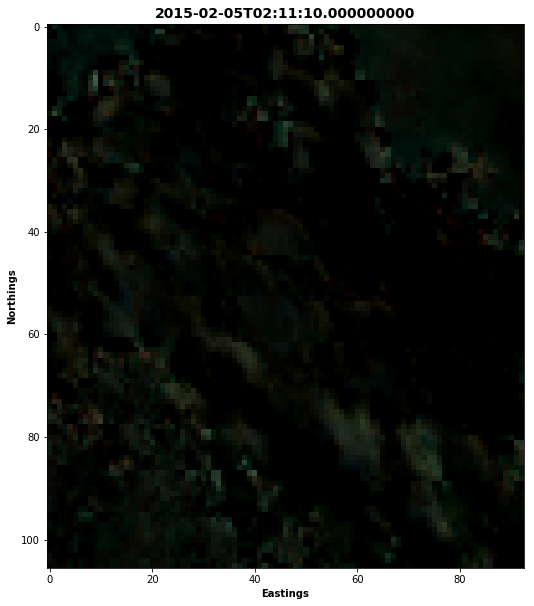

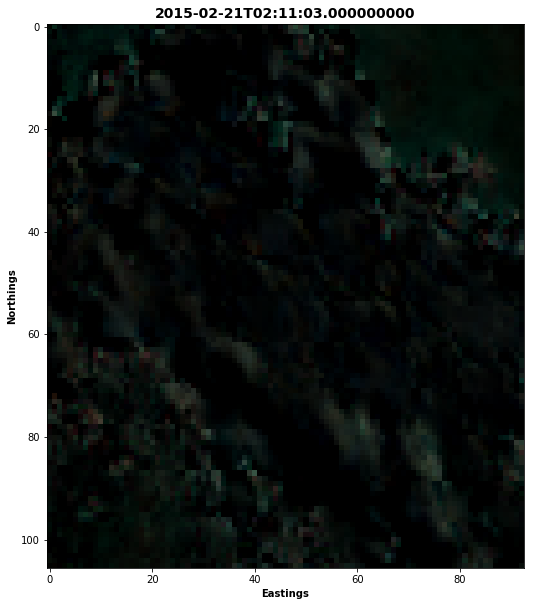

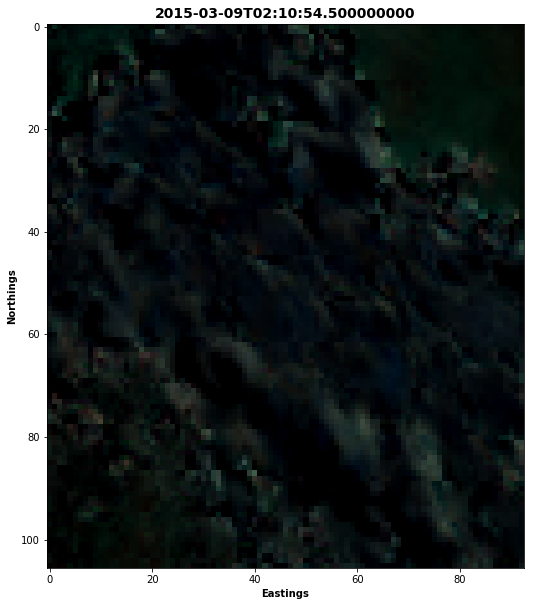

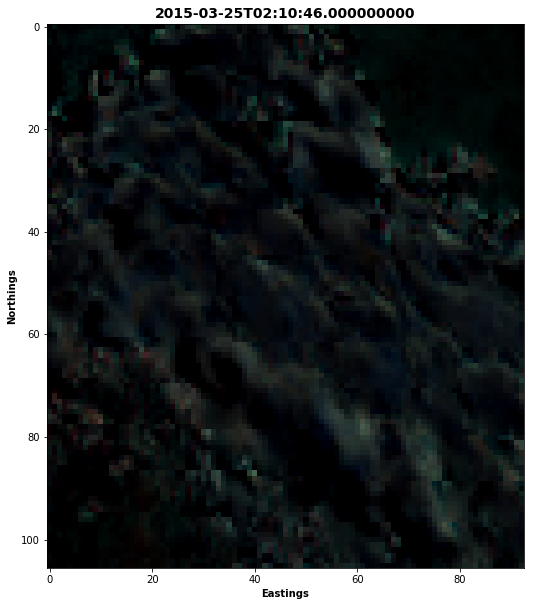

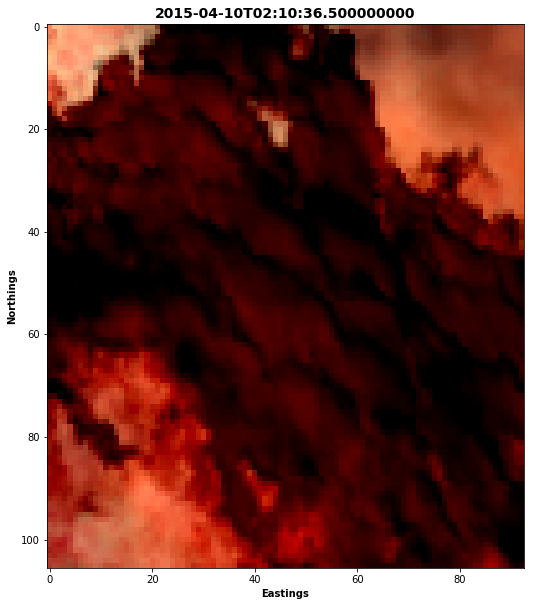

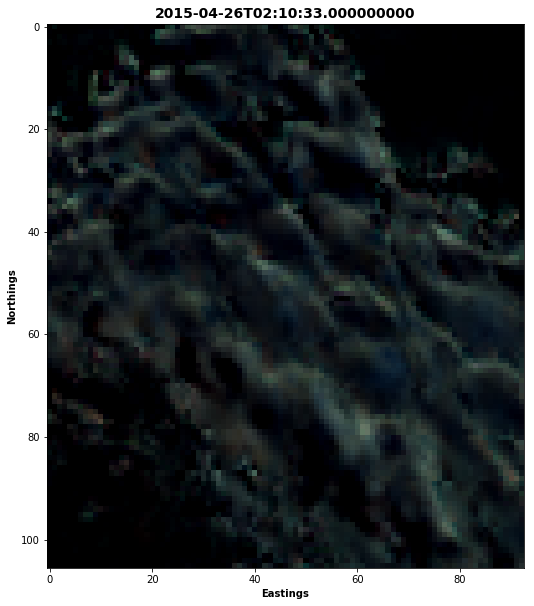

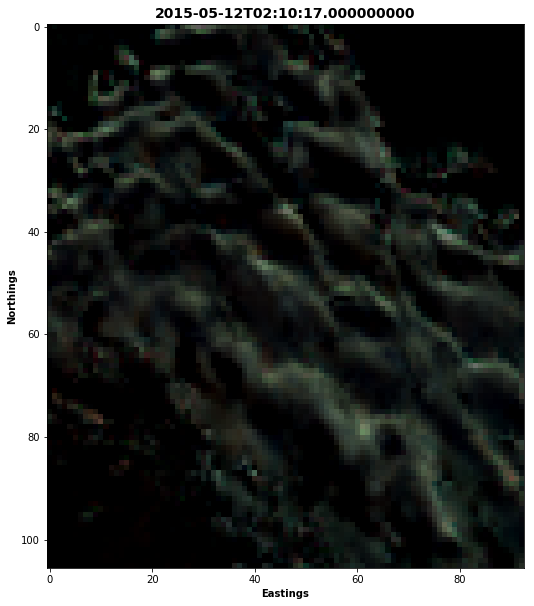

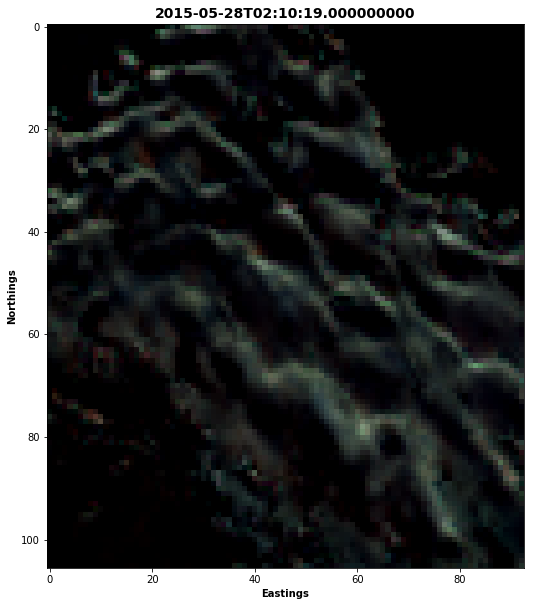

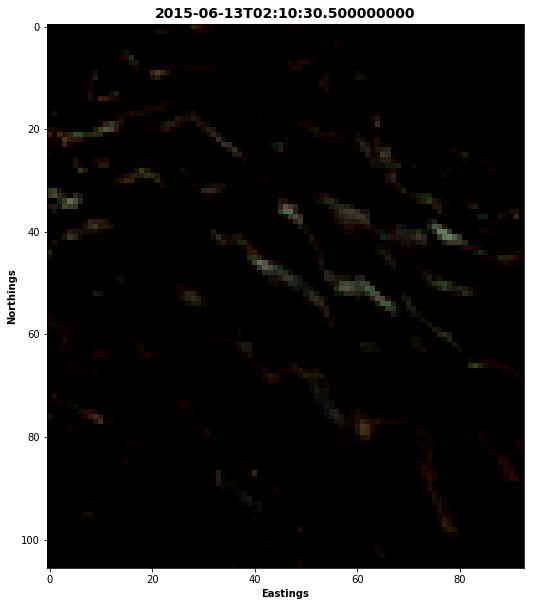

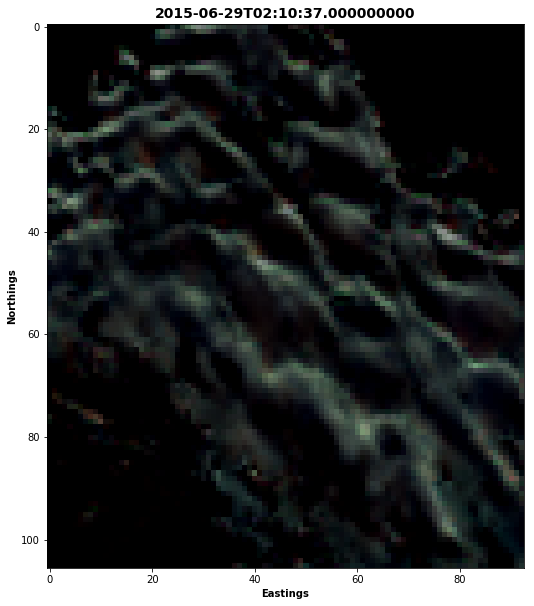

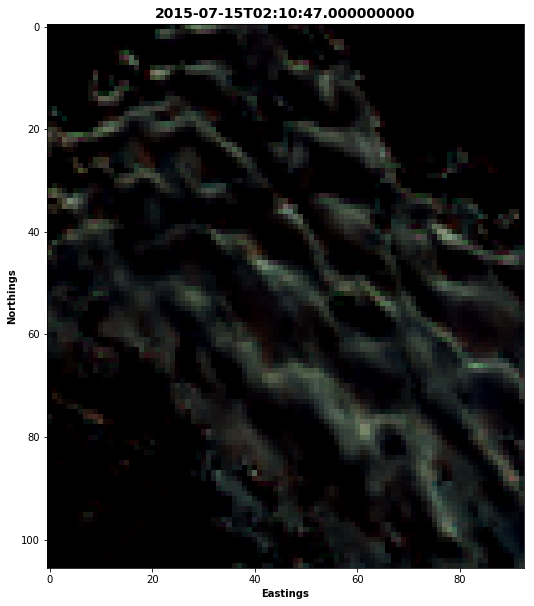

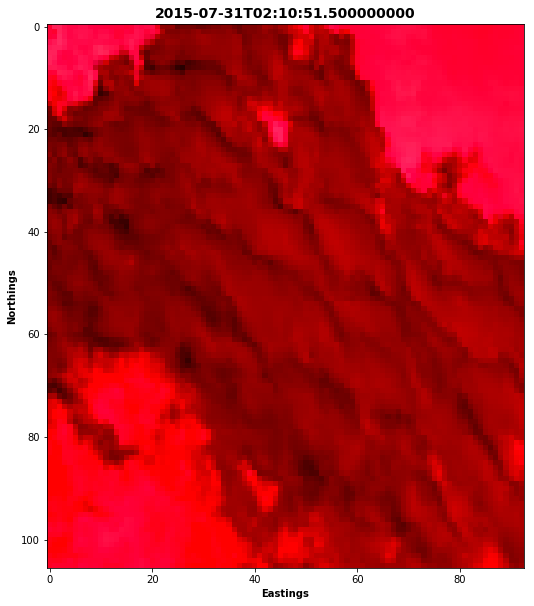

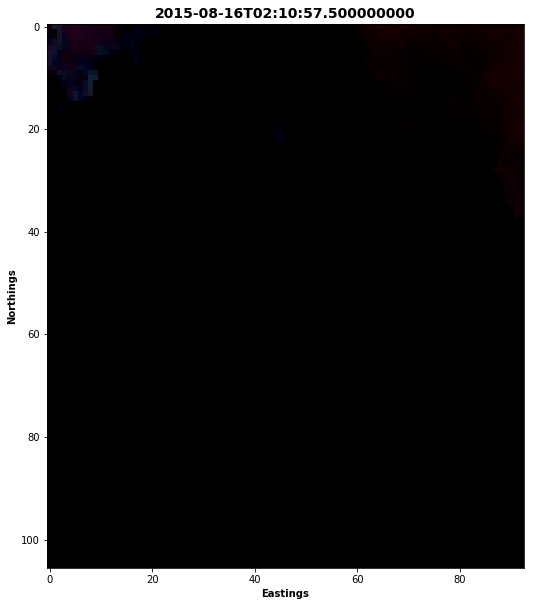

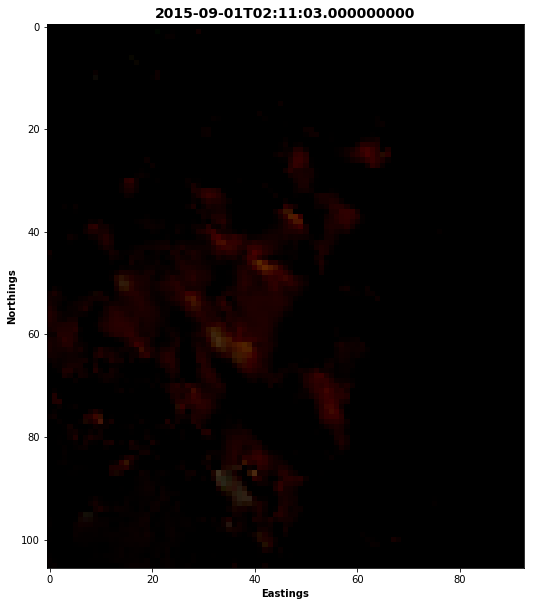

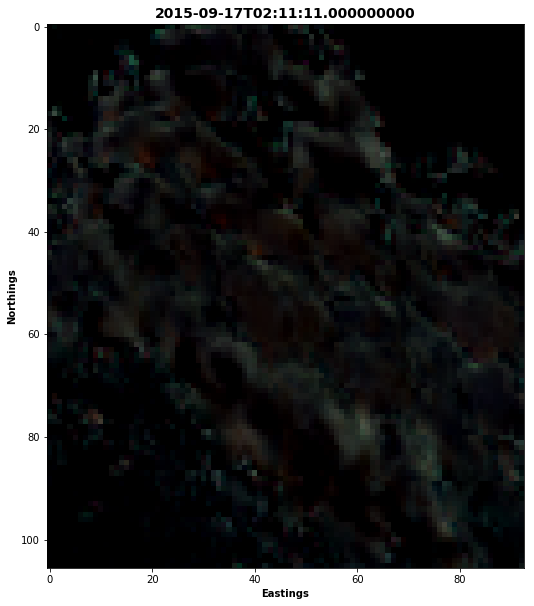

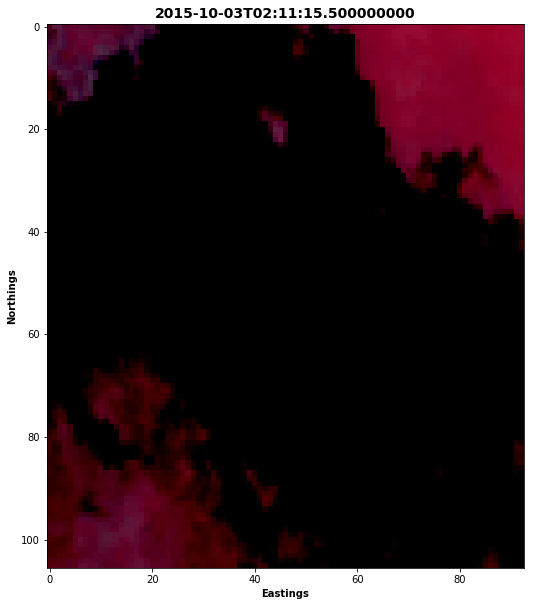

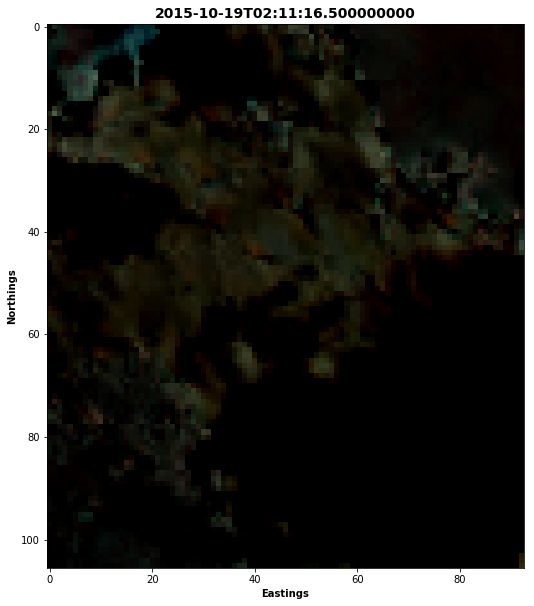

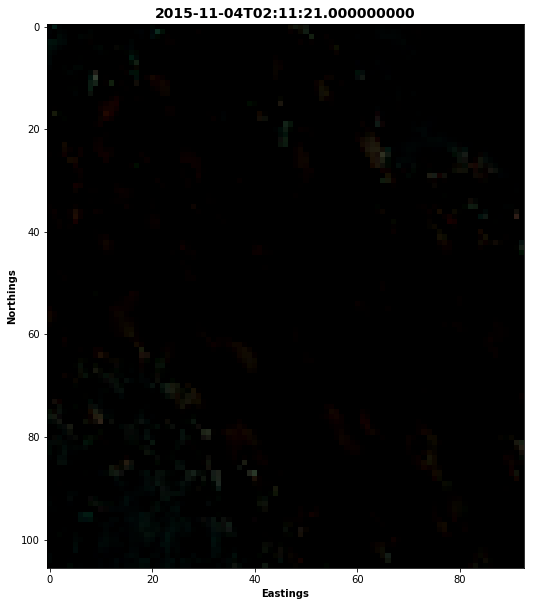

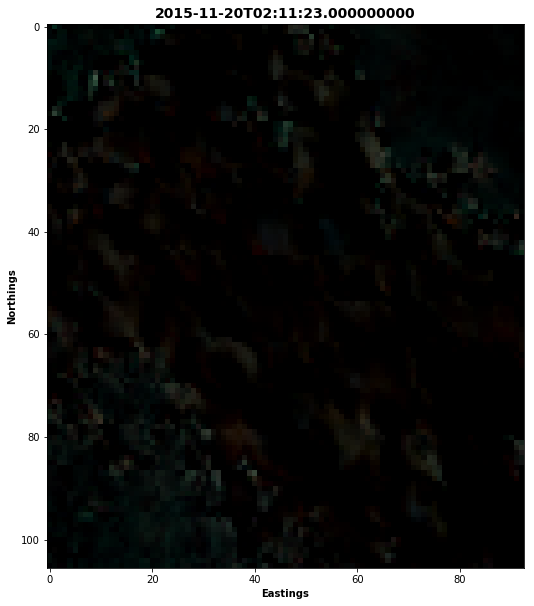

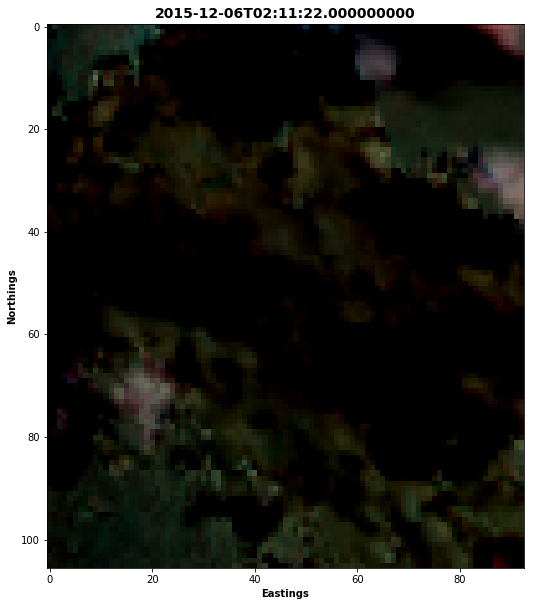

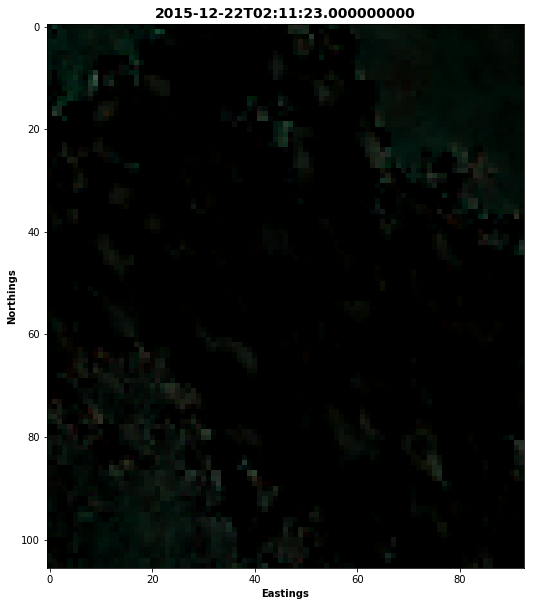

In [10]:
#fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(11.5, 9.5))
#plt.tight_layout(pad=5.5, w_pad=4.5, h_pad=2.5)

for i in range(len(sat_array['time'])):
    DEAPlotting.three_band_image(diffo, bands = ['nir', 'swir1', 'swir2'], time = i, contrast_enhance=False)
    #plt.savefig('GeoMed/2018_'+str(i)+'.png', transparent=True)

In [11]:
dc2 = datacube.Datacube()
query={'time': ('2010-01-01', '2017-12-31'),
 'lat': (-30.595141582265763, -30.573900084400902),
 'lon': (115.14502132590322, 115.16618234076345),
 'output_crs': 'EPSG:3577',
 'resampling': 'bilinear',
 'resolution': (-25.0, 25.0)}
geomed2 = dc2.load(product='ls8_nbart_geomedian_annual', **query)
geomed2

<xarray.Dataset>
Dimensions:  (time: 5, x: 93, y: 106)
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 2014-01-01 2015-01-01 ...
  * y        (y) float64 -3.433e+06 -3.433e+06 -3.433e+06 -3.433e+06 ...
  * x        (x) float64 -1.595e+06 -1.595e+06 -1.595e+06 -1.595e+06 ...
Data variables:
    blue     (time, y, x) int16 573 391 348 383 414 388 378 393 446 424 432 ...
    green    (time, y, x) int16 792 532 475 557 597 569 578 608 673 658 636 ...
    red      (time, y, x) int16 818 527 444 536 572 544 548 577 652 631 614 ...
    nir      (time, y, x) int16 2485 2124 2180 2270 2288 2291 2439 2473 2613 ...
    swir1    (time, y, x) int16 1982 1350 1271 1631 1654 1624 1596 1654 1836 ...
    swir2    (time, y, x) int16 1164 735 691 915 947 921 891 920 1037 1060 ...
Attributes:
    crs:      EPSG:3577

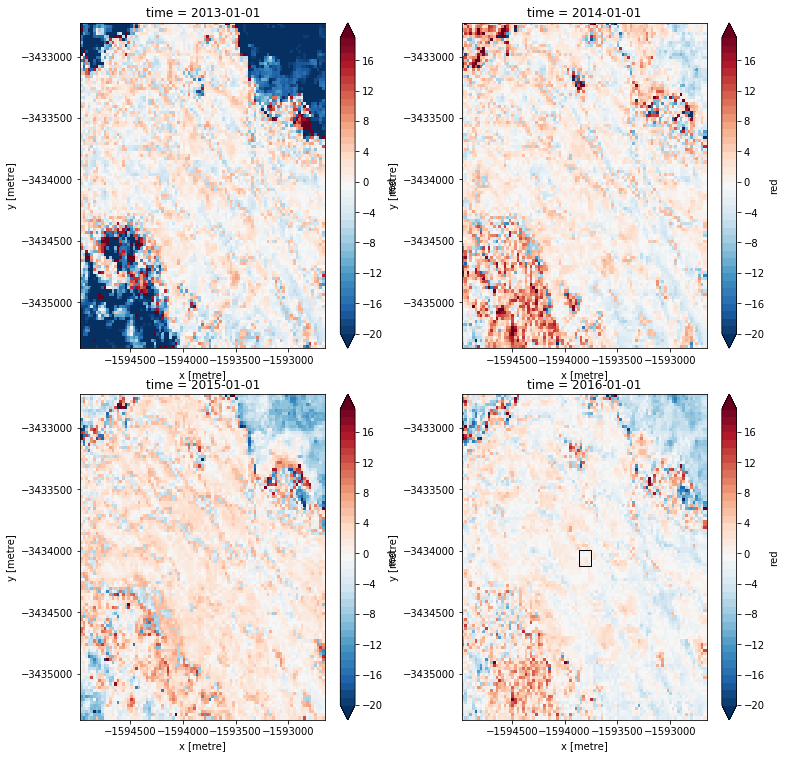

In [12]:

diffo2 = 100*(geomed2 - geomed.squeeze(dim='time'))/geomed.squeeze(dim='time')
#for i in range(len(diffo2['time'])):
#    DEAPlotting.three_band_image(diffo2, bands = ['red', 'green', 'blue'], time = i, contrast_enhance=False)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11.5, 11.5))
plt.tight_layout(pad=5.5, w_pad=4.5, h_pad=2.5)

levels = []
for i in range(-20, 20, 1):
    levels.append(i)

    
diffo2.red[0].plot(ax=axes[0,0], levels=levels)
diffo2.red[1].plot(ax=axes[0,1], levels=levels)
diffo2.red[2].plot(ax=axes[1,0], levels=levels)
diffo2.red[3].plot(ax=axes[1,1], levels=levels)

rect = patches.Rectangle((-1593860,-3434120), 110, 130, angle=0.0, fill=False, color='black')
axes[1,1].add_patch(rect)


0
3
6
9
12
15
18
21


IndexError: index 23 is out of bounds for axis 0 with size 23

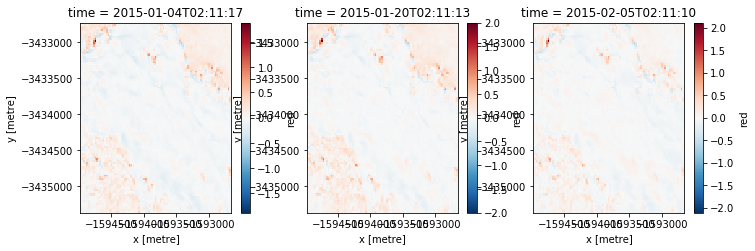

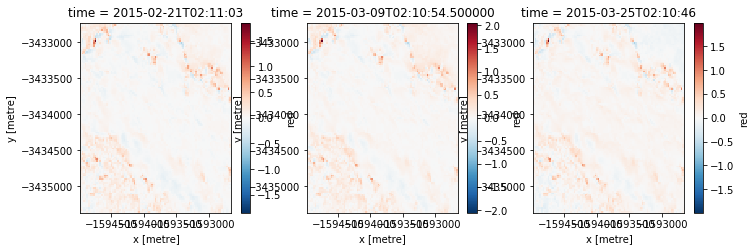

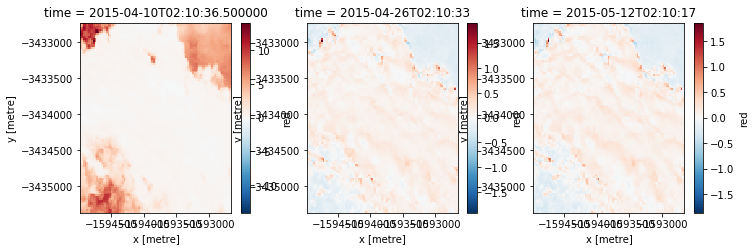

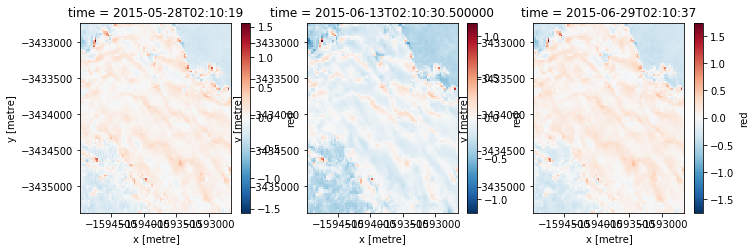

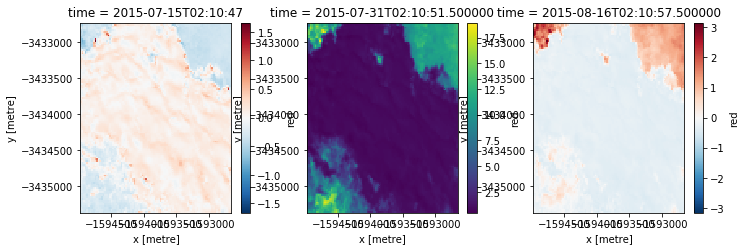

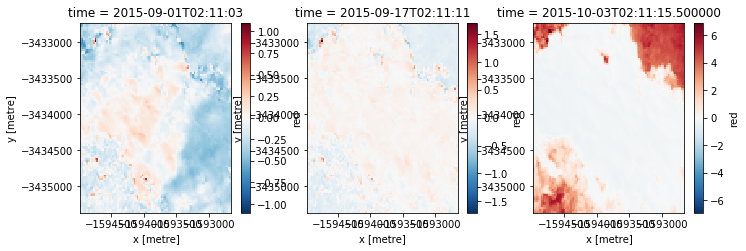

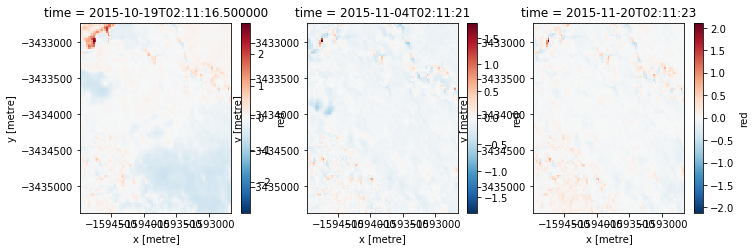

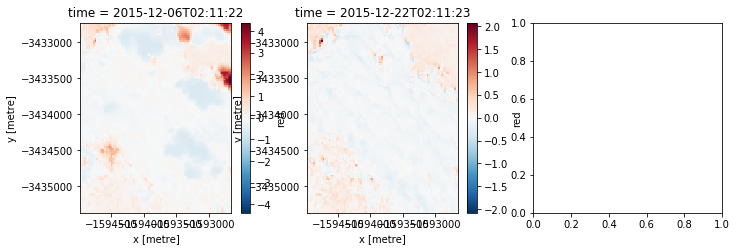

In [38]:
diffo3 = (sat_array - geomed.squeeze(dim='time'))/geomed.squeeze(dim='time')
for i in range(0,len(diffo3.time),3):
    print(i)
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(11.5, 3.5))
    diffo3.red[i].plot(ax=axes[0])
    diffo3.red[i+1].plot(ax=axes[1])
    diffo3.red[i+2].plot(ax=axes[2])
    